# k近傍法

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 訓練データ生成

In [22]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

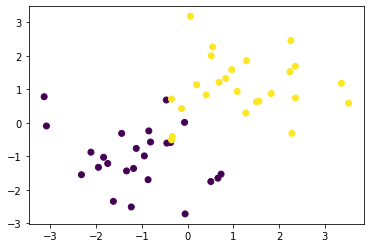

In [23]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

## 学習

In [16]:
X_train

array([[-0.07382497, -1.21808705],
       [-0.8450106 ,  1.09456205],
       [ 0.36551024, -2.08181192],
       [-0.75213342, -0.5670177 ],
       [-0.95001128, -0.62252164],
       [-0.38216377, -2.2608096 ],
       [-1.95192427, -2.30931772],
       [-1.43413616,  0.61098549],
       [-0.5802028 , -2.61587796],
       [-2.16026907, -1.26057838],
       [-0.97085798, -1.58198926],
       [-1.7592043 , -2.97245709],
       [-0.46782846,  0.23480171],
       [-1.3518584 , -1.43874891],
       [-1.63535615, -0.49545463],
       [-0.36433243, -1.62592404],
       [-1.42867759, -2.22281673],
       [-1.43434259, -1.15304716],
       [-0.79390009, -0.39298452],
       [-0.22067078, -1.15151297],
       [-2.13059945, -0.97808935],
       [-1.19586378, -2.04167633],
       [-0.13450837, -0.9579909 ],
       [-1.61329623, -0.8849247 ],
       [ 0.85319259, -1.97058214],
       [ 0.30111263,  2.11270434],
       [ 0.46997982,  1.28405985],
       [ 2.6823053 ,  1.38391834],
       [ 0.39357467,

In [24]:
ys_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

陽に訓練ステップはない

## 予測

予測するデータ点との、距離が最も近い$k$個の、訓練データのラベルの最頻値を割り当てる

In [10]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

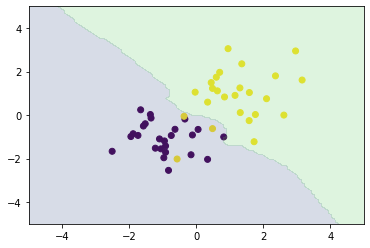

In [11]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

## sklearn実装

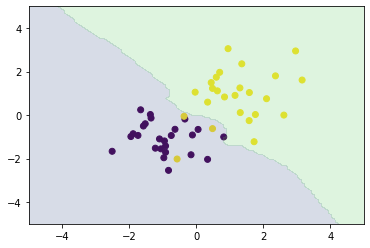

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, ys_train)
plt_resut(X_train, ys_train, knc.predict(X_test))

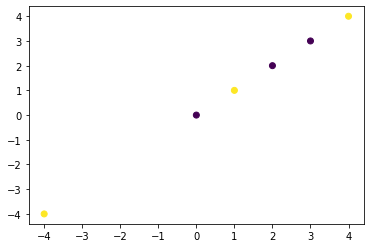

In [30]:
X_train = np.array([[0,0],[1,1], [2,2],[3,3], [4,4], [-4,-4]])
ys_train = np.array([0,1,0,0,1,1])
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

# 考察
単純かつ極端なデータに対して、Ｎの変更により結果がどのように変わるかを確認する。

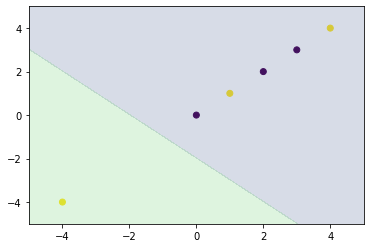

In [31]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

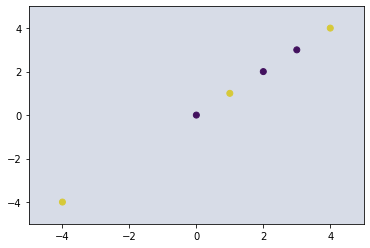

In [32]:
n_neighbors = 2

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

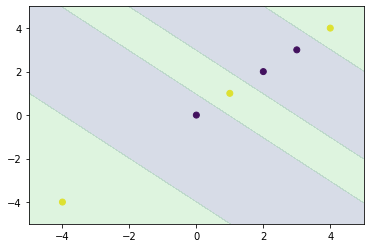

In [33]:
n_neighbors = 1

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

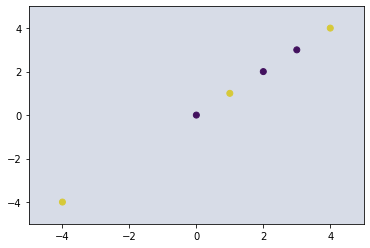

In [34]:
n_neighbors = 4

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)